<a href="https://colab.research.google.com/github/Phoebe125/Black-Scholes-Model/blob/main/Black_Scholes_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#필요한 라이브러리를 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
#B-S formula
def european_options(S, K, T, r, sigma, option_type):
  d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * T)/(sigma + np.sqrt(T))
  d2 = d1 - sigma * np.sqrt(T)

  if option_type == 'call':
    V = S * stats.norm.cdf(d1) - K * np.exp(-r * T) * stats.norm.cdf(d2)

  elif option_type == 'put':
    V = -S * stats.norm.cdf(-d1) + K * np.exp(-r * T) * stats.norm.cdf(-d2)

  return V


In [ ]:
S = 100
K = 100
r = 0.01
T = 1
sigma = 0.25
print('콜옵션 가격: ', european_options(S, K, T, r, sigma, 'call'))
print('풋옵션 가격: ', european_options(S, K, T, r, sigma, 'put'))

콜옵션 가격:  10.317893907031149
풋옵션 가격:  9.32287728194796


In [ ]:
#B-S 시각화
T = np.linspace(0, 1, 100) #0부터 1까지 100으로 정확히 나눔
S = np.linspace(0, 200, 100)
T,S = np.meshgrid(T,S) #meshgrid??

Call_value = european_options(S, K, T, r, sigma, 'call')
Put_value = european_options(S, K, T, r, sigma, 'put')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


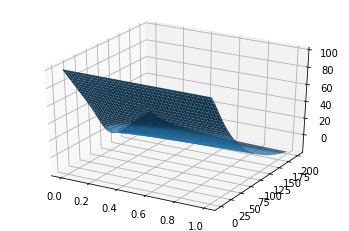

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection':'3d'})
ax.plot_surface(T,S, Put_value);

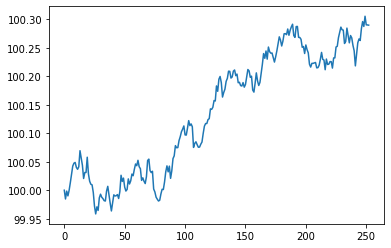

In [ ]:
#Wiener Process 시각화
S0 = 100 #현재 시점의 주식 가격
T = 1 #1년까지 시뮬레이션
D = 252
dt = T/D #time step
sigma = 0.2

S = np.zeros(D+1) #253개 0으로 구성된 행렬
S[0] = S0

#drift가 업는 형태
for t in range(1, D+1):
  S[t] = S[t-1] + sigma * np.sqrt(dt) * np.random.randn() #np.random.randn()는 표준 정규분포함수

plt.plot(S)

In [ ]:
#로그노말 분포를 따르는 주식의 만기시점 가치 모델링
S0 = 100
mu = 0.1
sigma = 0.2
T =1
D = 253
dt = T/D
N = 10000 #시뮬레이션 횟수

In [ ]:
#Monte Carlo Simulation
S = np.zeros((D+1,N)) 
#S.shape (253, 10000) 10000번 반복한다
S[0] = S0

for t in range(1, D+1):
  S[t] = S[t-1] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * np.random.randn(N))

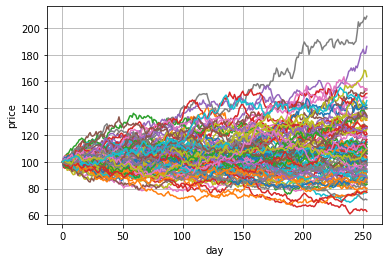

In [ ]:
plt.plot(S[:, :100])
plt.xlabel('day')
plt.ylabel('price')
plt.grid(True)

In [ ]:
#G Brownian Motion을 따르면 로그 노말을 따른다

In [ ]:
#Histogram을 통한 분포 확인
St = S0 * np.exp((mu - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * np.random.randn(N))

print(St)

[ 67.49616292 108.12920908 113.8135333  ...  78.83734464 143.35006722
 154.54605041]


Text(0, 0.5, 'frequency')

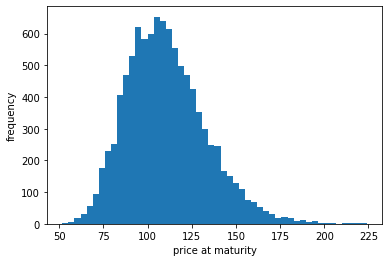

In [ ]:
plt.hist(St, bins=50)
plt.xlabel('price at maturity')
plt.ylabel('frequency')
#결론: 로그노말 형태를 띠고 있다.